In [165]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [166]:
from pydantic import BaseModel, Field
from typing import List
import json

In [167]:
from pydantic import BaseModel
from typing import List

class DataItem(BaseModel):
    P: int
    SR: int
    cP: float
    T: int
    SS: float

class DataList(BaseModel):
    data: List[DataItem]


In [168]:
# read data from the data folder
data_folder = Path("__file__").parent / "data"
data_file_name = "data.json"
with open(data_folder / data_file_name, "r") as f:
    json_data = f.read()
# Parse the JSON data
data = json.loads(json_data)

In [169]:
# print keys of the data
print(data.keys())

dict_keys(['HPyBF4_CP', 'HPyBF4_CT', 'HPyBr_CP', 'HPyBr_CT', 'OPyBr_CP', 'BMIMBr_CP_CT', 'BMIMBr_CT'])


In [236]:
class MyPlot:

    def __init__(self):
        self.ils_names: List = []

    def filter_data(self, data, il_name):
        filtered_data = pd.DataFrame(data[il_name])
        return filtered_data

    def group_data(self, filtered_data, group_by_parameter: str = 'T'):
        list_unique = filtered_data[group_by_parameter].unique()
        return list_unique

    def plot_data(self,
                  data, il_name, grouop_by_parameter: str = 'T',
                  x_parameter: str = 'SR', y_parameter: str = 'SS',
                  y_axis_log_scale: bool = False,
                  legend_units: str = 'F'
                  ):

        self.ils_names = list(data.keys())

        filtered_data = self.filter_data(data, il_name)
        list_unique = self.group_data(filtered_data, grouop_by_parameter)

        # fig size
        plt.figure(figsize=(12, 8))
        for case in list_unique:
            # separate data by parameter
            data = filtered_data[filtered_data[grouop_by_parameter] == case]
            plt.plot(data[x_parameter], data[y_parameter], label =f'{grouop_by_parameter} = {case} {legend_units}',
                     marker = 'o', linestyle = '--')
            # legend at the top right corner
            plt.legend(loc='upper right')
            plt.xlabel(x_parameter)
            plt.ylabel(y_parameter)
            # font size
            plt.rcParams.update({'font.size': 18})
            # axis font size
            plt.tick_params(axis='both', which='major', labelsize=18)
            if y_axis_log_scale:
                # y axis log scale
                plt.yscale('log')
            plt.title(il_name)
        plt.show()


In [237]:
obj = MyPlot()

In [238]:
# obj.plot_data(
#     data,
#     'HPyBF4_CP',
#     grouop_by_parameter='T',
#     x_parameter='SR',
#     y_parameter='SS'
# )

In [239]:
# obj.ils_names

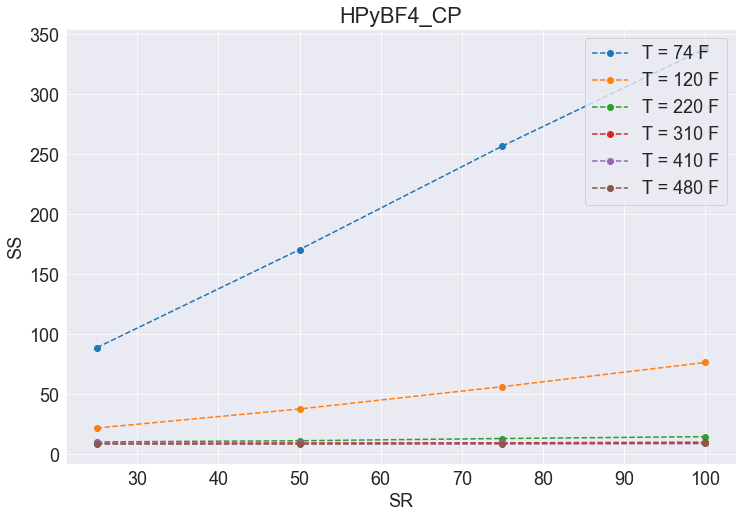

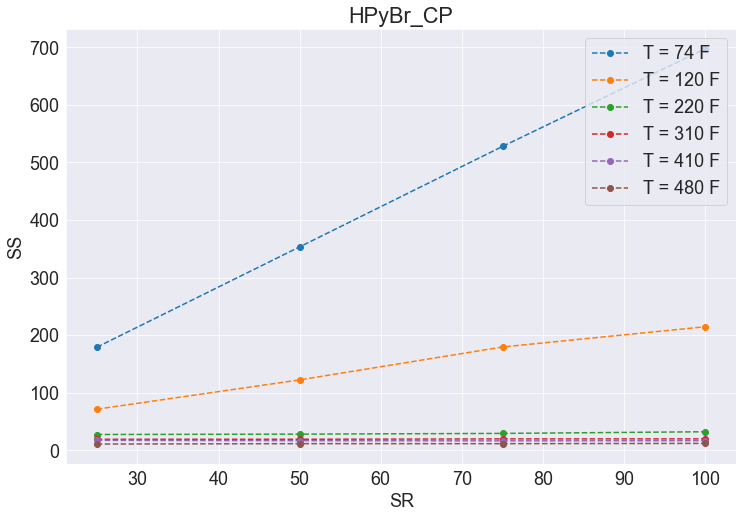

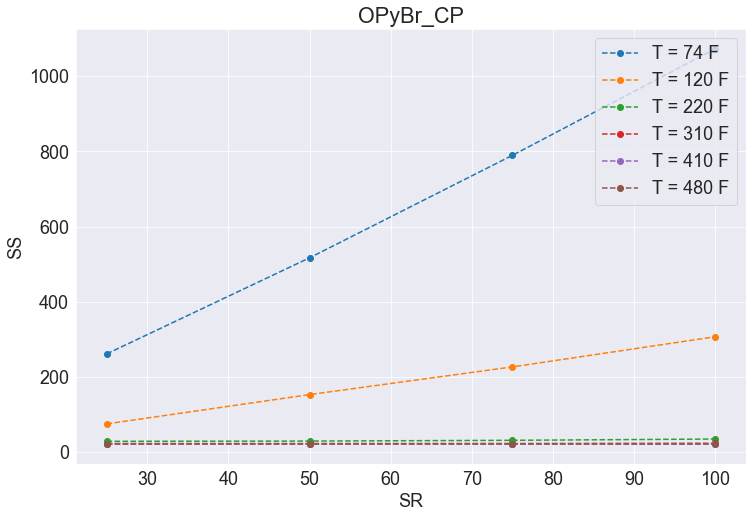

In [240]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',
    'HPyBr_CP',
    # 'HPyBr_CT',
    'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='T',
    x_parameter='SR',
    y_parameter='SS',
    legend_units='F'
)

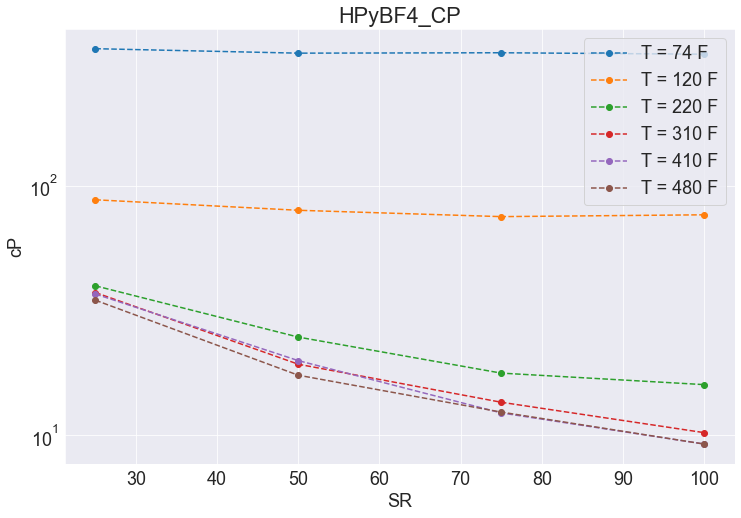

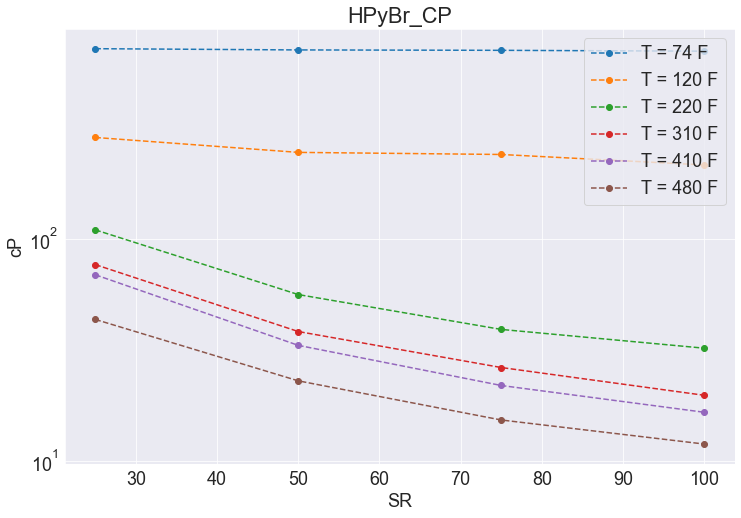

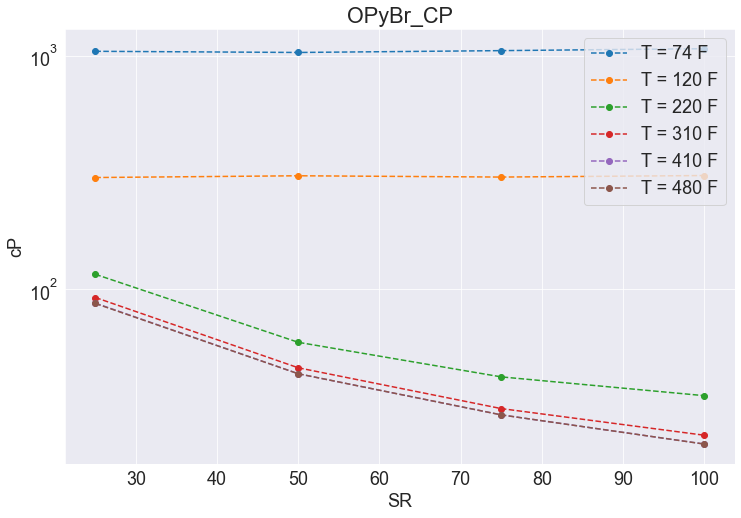

In [241]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',
    'HPyBr_CP',
    # 'HPyBr_CT',
    'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='T',
    x_parameter='SR',
    y_parameter='cP',
    y_axis_log_scale=True
)

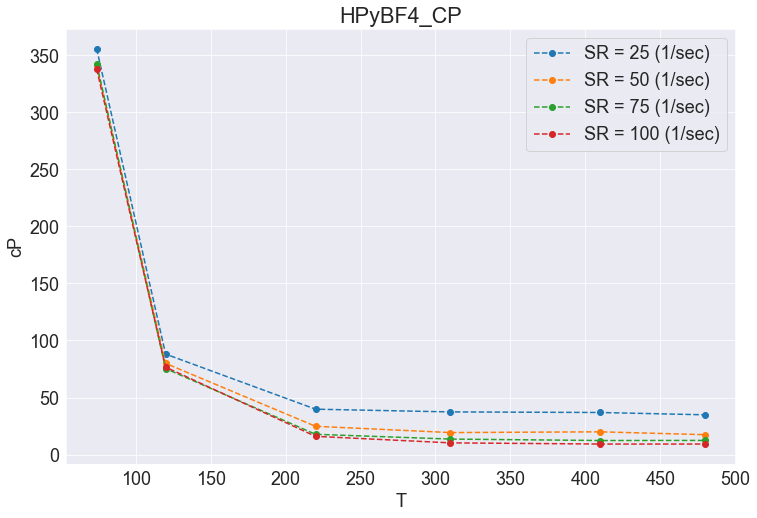

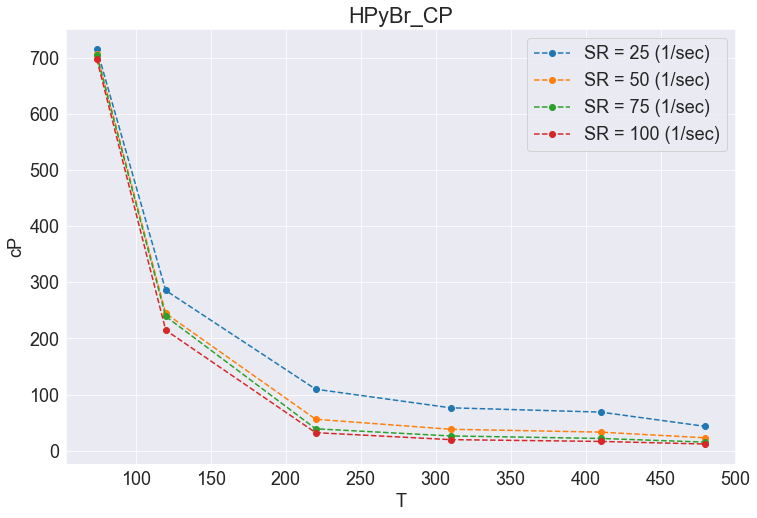

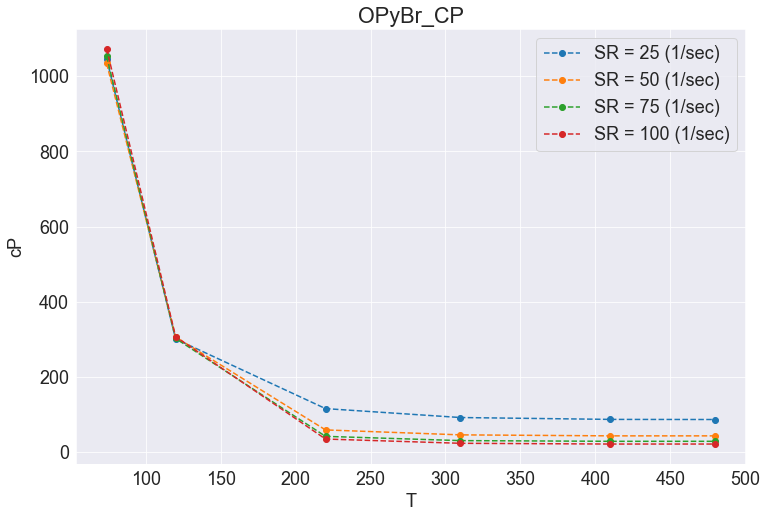

In [242]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',
    'HPyBr_CP',
    # 'HPyBr_CT',
    'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='SR',
    x_parameter='T',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(1/sec)'
)

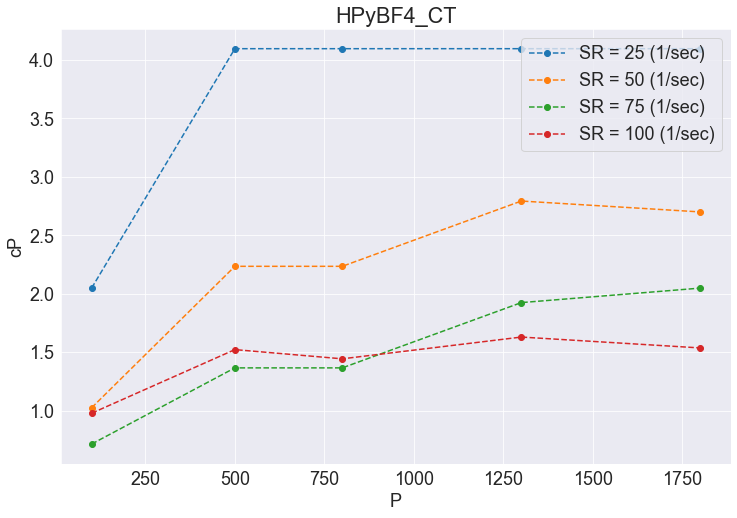

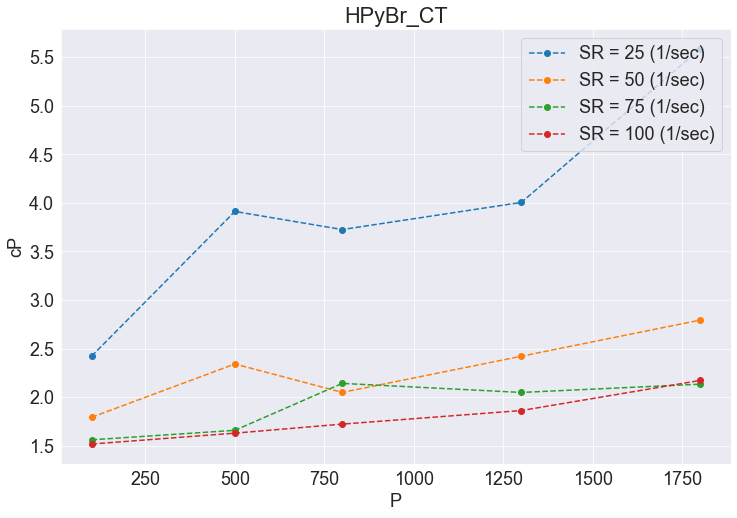

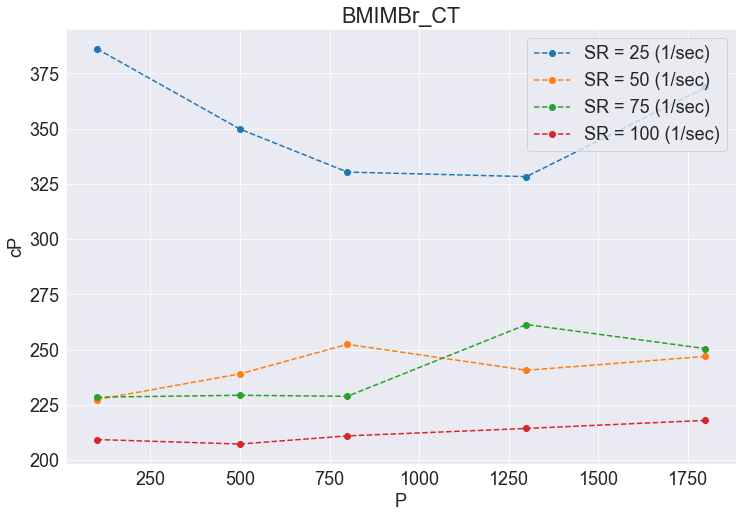

In [252]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',
    # 'HPyBr_CP',
    'HPyBr_CT',
    # 'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='SR',
    x_parameter='P',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(1/sec)'
)

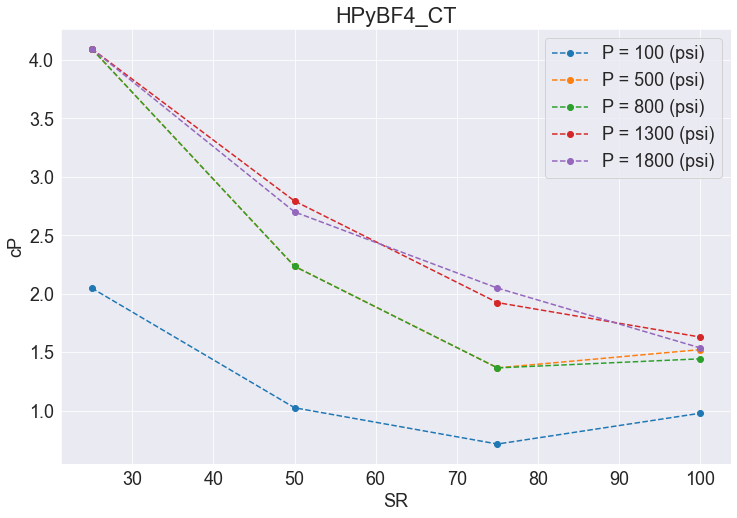

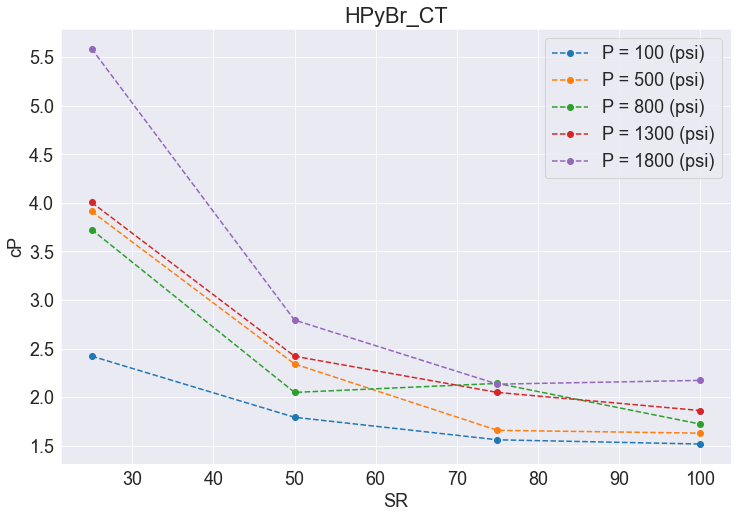

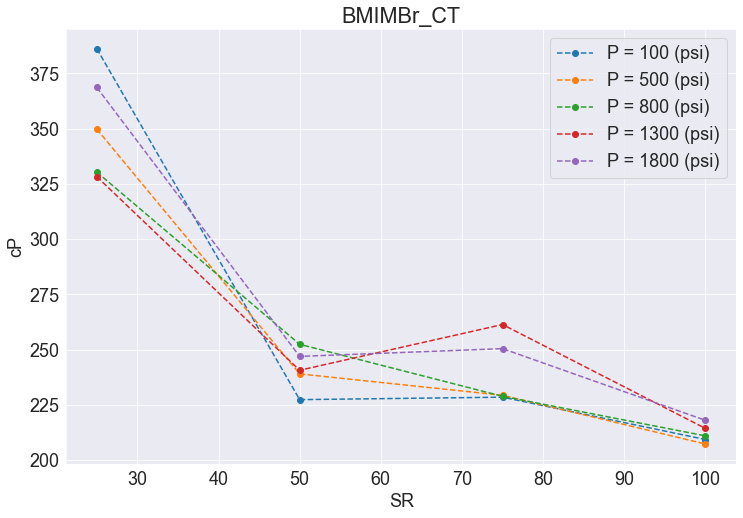

In [249]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',
    # 'HPyBr_CP',
    'HPyBr_CT',
    # 'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='P',
    x_parameter='SR',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(psi)'
)